In [1]:
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.decomposition import FastICA
from sklearn.preprocessing import MinMaxScaler

In [2]:
data = pd.read_csv('C:/Users/Swetha/OneDrive/Desktop/major project\MP(9/Major Project 9/Epileptic Seizure Recognition.csv')
data = data.drop('Unnamed',axis=1)
data = data.dropna()

In [3]:
data.shape

(11500, 179)

In [4]:
n_components = 4
ica = FastICA(n_components=n_components)
ica_components = ica.fit_transform(data)

print(len(ica_components))

11500


In [5]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix
from sklearn.ensemble import RandomForestClassifier,GradientBoostingClassifier
print(data['y'].value_counts())


y
4    2300
1    2300
5    2300
2    2300
3    2300
Name: count, dtype: int64


In [6]:
dic = {5: 0, 4: 0, 3: 0, 2: 0, 1: 1}
data['y'] = data['y'].map(dic)
print(data['y'].value_counts())

y
0    9200
1    2300
Name: count, dtype: int64


In [7]:
data.head()

,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,...,X170,X171,X172,X173,X174,X175,X176,X177,X178,y
0,135,190,229,223,192,125,55,-9,-33,-38,...,-17,-15,-31,-77,-103,-127,-116,-83,-51,0
1,386,382,356,331,320,315,307,272,244,232,...,164,150,146,152,157,156,154,143,129,1
2,-32,-39,-47,-37,-32,-36,-57,-73,-85,-94,...,57,64,48,19,-12,-30,-35,-35,-36,0
3,-105,-101,-96,-92,-89,-95,-102,-100,-87,-79,...,-82,-81,-80,-77,-85,-77,-72,-69,-65,0
4,-9,-65,-98,-102,-78,-48,-16,0,-21,-59,...,4,2,-12,-32,-41,-65,-83,-89,-73,0


In [8]:
ica_df = pd.DataFrame(ica_components, columns=[f'ica_feature_{i}' for i in range(1, n_components + 1)])
data = pd.concat([data.drop('y', axis=1), ica_df, data['y']], axis=1)
X = data.drop('y', axis=1)
y = data['y']

In [9]:
X_train, X_test, y_train, y_test = train_test_split(ica_components, y, test_size=.2, random_state=42)
print(len(y_train))
print(len(X_train))


9200
9200


In [10]:
model = RandomForestClassifier(max_depth=20)
model.fit(X_train,y_train)
model1 = GradientBoostingClassifier(n_estimators=100)
model1.fit(X_train,y_train)


GradientBoostingClassifier()

In [11]:
pred = model.predict(X_test)
pred1 = model1.predict(X_test)
print(f" Random Forest Accuracy Score:{accuracy_score(pred,y_test)*100}")
print(f" Gradient Boosting Accuracy Score:{accuracy_score(pred1,y_test)*100}")


 Random Forest Accuracy Score:96.43478260869566
 Gradient Boosting Accuracy Score:95.52173913043478


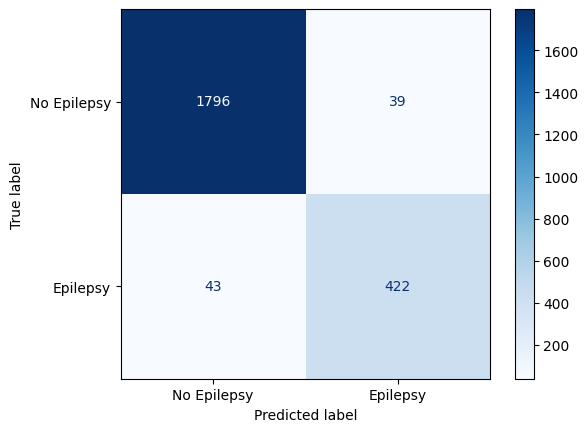

In [12]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

classes = ['No Epilepsy', 'Epilepsy']
cm_rf = confusion_matrix(y_test, pred)
disp_rf = ConfusionMatrixDisplay(confusion_matrix=cm_rf, display_labels=classes)
disp_rf.plot(cmap='Blues')


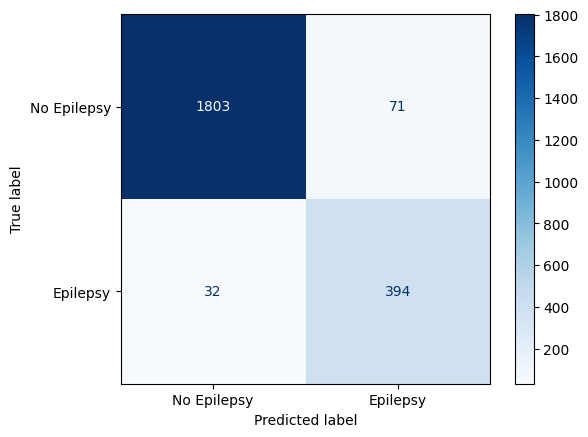

In [13]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

classes = ['No Epilepsy', 'Epilepsy']
cm_rf = confusion_matrix(pred1,y_test)
disp_rf = ConfusionMatrixDisplay(confusion_matrix=cm_rf, display_labels=classes)
disp_rf.plot(cmap='Blues')


In [14]:
cf = classification_report(y_test,pred)
print(cf)
cf1 = classification_report(y_test,pred1)
print(cf1)

              precision    recall  f1-score   support

           0       0.98      0.98      0.98      1835
           1       0.92      0.91      0.91       465

    accuracy                           0.96      2300
   macro avg       0.95      0.94      0.94      2300
weighted avg       0.96      0.96      0.96      2300

              precision    recall  f1-score   support

           0       0.96      0.98      0.97      1835
           1       0.92      0.85      0.88       465

    accuracy                           0.96      2300
   macro avg       0.94      0.91      0.93      2300
weighted avg       0.95      0.96      0.95      2300



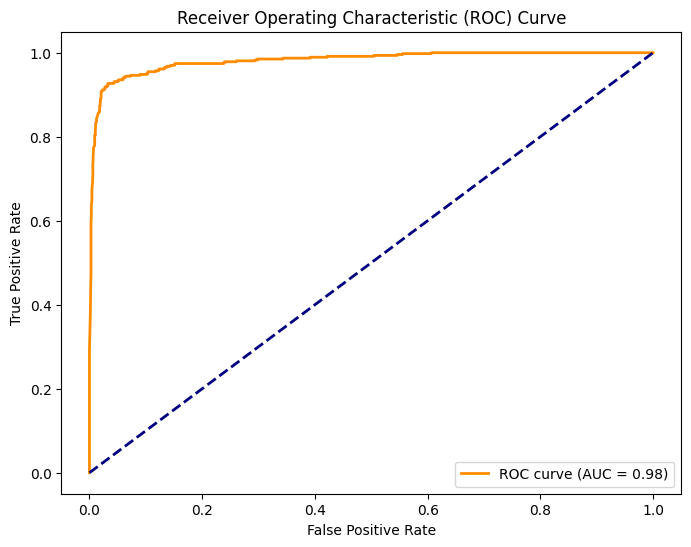

In [15]:
from sklearn.metrics import roc_curve,auc
y_probs = model.predict_proba(X_test)[:, 1]

fpr, tpr, thresholds = roc_curve(y_test, y_probs)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

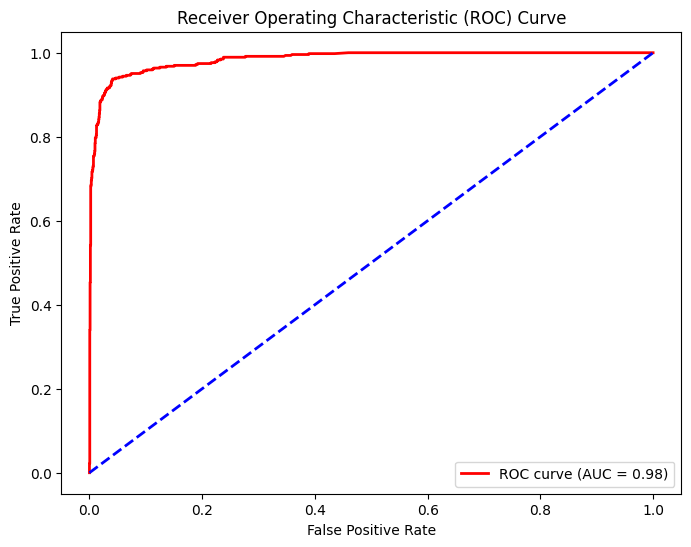

In [16]:
from sklearn.metrics import roc_curve,auc
y_probs = model1.predict_proba(X_test)[:, 1]

# Compute ROC curve and AUC
fpr, tpr, thresholds = roc_curve(y_test, y_probs)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='red', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='blue', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

In [17]:
import pickle
with open('model_random.pkl', 'wb') as model_file:
    pickle.dump((model, model1, ica), model_file)